# Unsupervised Learning with SKLearn
## Clustering
Clustering is a form of unsupervised learning where a large number of datapoints are split depending on their variance. There are several clustering algorithms, however this example will use k-means clustering, which is the simplest and most common.

k-means clustering works by placing random k seed points in the datafeild which reperesent the center of initial cluster. 
* Each datapoint is iterated over to discover its closest cluster center.
* New mean is calculated from points in a cluster to assign a new center point.

An Example of K-Means in use with data created using `make_blobs` from `sklearn.datasets` which creates a number of gaussian clusters. `data` will hold the data, and `true_labels` will hold which cluster each datapoint belongs to.

In [1]:
from sklearn.datasets import make_blobs

#Make a dataset of 500 points in 4 clusters.
data, true_labels = make_blobs(n_samples=500, centers=4, random_state=6)

The data can be handeled easier if its in a `DataFrame`, so the data is placed into a `DataFrame` and displayed as a graph. The four clusters can easily be identified.

<AxesSubplot:xlabel='x1', ylabel='x2'>

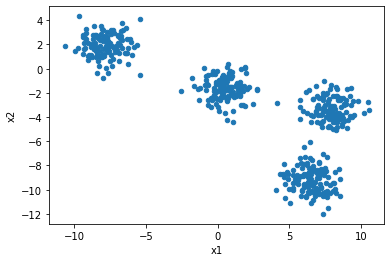

In [2]:
%matplotlib inline

from pandas import DataFrame

points = DataFrame(data, columns=["x1", "x2"])
points.plot.scatter("x1", "x2")

k-means works well with distinct clusters therefore is an ideal solution to this problem. The `KMeans` object is initialized with a hyperparameter `n_clusters` specifying how many clusters there needs to be. There are more hyperparameters that can be used however these are not needed in this problem.

`.fit()` can then be used to perform the algorithm. `points` is passed in as the dataset.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

KMeans(n_clusters=4)

To show the identified clusters along with the discovered center points, a graph can be plotted using `kmeans.cluster_centers` and `kmeans.labels_`

In [4]:
#create a DataFrame for cluster_centers
cluster_centers = DataFrame(kmeans.cluster_centers_, columns=["x1", "x2"])
cluster_centers

,x1,x2
0,0.485425,-1.628580
1,7.886559,-3.337117
2,-7.857994,1.892259
3,6.485156,-9.212537


<AxesSubplot:xlabel='x1', ylabel='x2'>

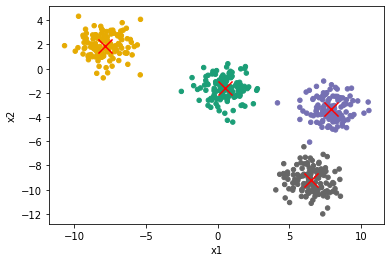

In [5]:
ax = points.plot.scatter("x1", "x2", c=kmeans.labels_, colormap="Dark2", colorbar=False)
cluster_centers.plot.scatter("x1", "x2", ax=ax, c="red", s=200, marker="x")

Below shows the `true_labels` for the data. The label values may be different hence the different colours, however the clusters have been correctly distinguished.

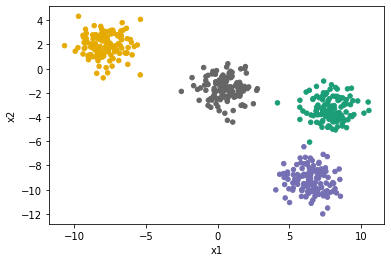

In [6]:
ax = points.plot.scatter("x1", "x2", c=true_labels, colormap="Dark2", colorbar=False)

## Nearest Neighbours
Nearest neightbours is another unsupervised learning algorithm. It works by discovering data points closest neighbours. When a prediction is asked for x, nearest neighbour will discover the nearest datapoints and assign x the most common label in its area. In this example, `make_moons` from `sklearn.datasets` provides a dataset.

<AxesSubplot:xlabel='x1', ylabel='x2'>

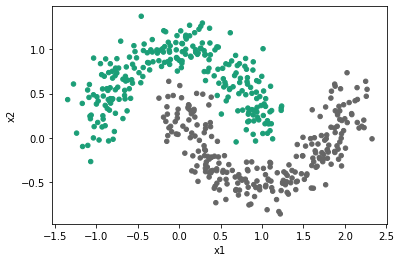

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X = DataFrame(X, columns=["x1", "x2"])

X.plot.scatter("x1", "x2", c=y, colormap="Dark2", colorbar=False)

The data needs to be split into a `train` set and a `test` set. `train_test_split` is used for this purpose. The data is stored in seperate tables for features and labels to be kept seperate.

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

`KNeighborsClassifier` is a sklearn model using the nearest neighbour algorithm. `KNeighborsClassifier` has several hyperparameters, but the two that are going to be configured in this example are `n_neighbors` which is the number of neighbours the algorithm compared a datapoint to.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

Next the `fit()` method is called, and the training data is passed in, seperatly as features and their labels. Nearest neighbours is a non-generalising learning algorithm (Or Instance based learning). Instead of producing a function or a set of variables which accociates and performs predictions with the relationship between features and labels, a non generalising algorithm stores the training dataset passed into it, and makes predictions based on where a predictionn is placed among the labbeled data set.

In [10]:
model.fit(train_X, train_y)

KNeighborsClassifier()

Non generalising learning algorithms have their advantages and disadvantages, but for this dataset the algorithm works very well at correctly labbeling examples. `.score` can be used to check the performance of the model with the test set:

In [12]:
model.score(test_X, test_y)

1.0

The data can be plotted on a graph with shaded areas where data will be classified as a certain label a colour. (Need to learn this matplotlib functio, copied from the tutorial.)

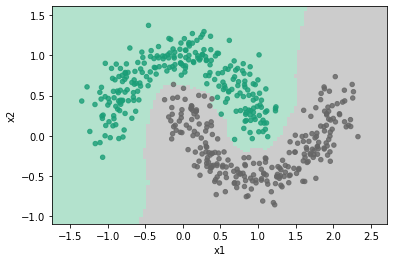

In [14]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(model, X, y)